# FOCAL BENCHMARKING

This benchmarking uses normmalized units: $$e = m_e = \epsilon_0 = c = \mu_0 = 1 $$ 
* The plasma density $$n_0 = 2  \rightarrow  \omega^2_p = 2$$
* The magnetic field $$B_0 = 2 \rightarrow \omega_{ce} = 2$$
  Note: ion motion is neglected.

In [1]:
#import libraries
import numpy as np
import math as mp
import matplotlib.pyplot as plt

In [2]:
#Initialize plasma and cyclotron frequency
omega2_p = 2
omega_ce = 2

## Parallel Propagation: Right-handed wave

* Dispertion relation: 
$$n^2_R = \frac{k^2}{\omega^2} = 1 - \frac{\omega^2_p}{\omega(\omega - \omega_{ce})}$$
-Resonant mode at $\omega=\omega_{ce}$. <br>
-Cutoff frequency
$$\omega_R = \frac{\omega_{ce}}{2} + \sqrt{(\frac{\omega_{ce}}{2})^2 + \omega^2_p}$$

In [3]:
f_cut_R = 1 + np.sqrt(3)
omega_iR = np.linspace(0.1, omega_ce-0.05,10000)
omega_fR = np.linspace(omega_ce+0.0001, f_cut_R,10000)

In [4]:
#Compute the values of the wavevector K
k_iR = np.sqrt( (omega_iR**2) - ((omega_iR*omega2_p)/( omega_iR - omega_ce ) ) ) #\omega < \omega_ce
k_fR = np.sqrt( (omega_fR**2) - ((omega_fR*omega2_p)/( omega_fR + omega_ce ) ) ) #\omega > \omega_ce

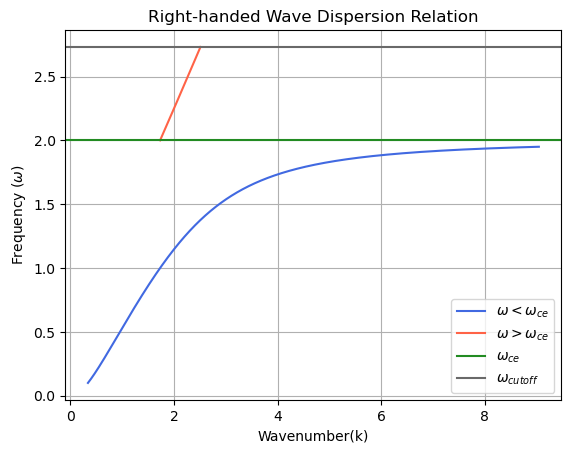

In [5]:
plt.plot(k_iR, omega_iR, "royalblue", label= r"$\omega < \omega_{ce}$" )
plt.plot(k_fR, omega_fR, "tomato", label = r"$\omega > \omega_{ce}$" )
plt.axhline(omega_ce, color="forestgreen", label = r"$\omega_{ce}$")
plt.axhline(f_cut_R, color="dimgray", label = r"$\omega_{cutoff}$")
plt.title("Right-handed Wave Dispersion Relation")
plt.xlabel("Wavenumber(k)")
plt.ylabel(r"Frequency ($\omega$)")
plt.grid(True)
plt.legend()
plt.savefig("right-hand_dr.png", dpi = 800)
plt.show()

## Left-handed wave

* Dispertion relation: 
$$n^2_L = \frac{k^2}{\omega^2} = 1 - \frac{\omega^2_p}{\omega(\omega + \omega_{ce})}$$
-Cutoff frequency
$$\omega_L = -\frac{\omega_{ce}}{2} + \sqrt{(\frac{\omega_{ce}}{2})^2 + \omega^2_p}$$
For this wave, resonance is at $\omega = \omega_{ci}$

In [6]:
f_cut_L = -1 + np.sqrt(3)
omega_iL = np.linspace(0.7, omega_ce-0.05,10000)

In [7]:
#Compute the values of the wavevector K
k_iL = np.sqrt( (omega_iL**2) - ((omega_iL*omega2_p)/( omega_iL + omega_ce ) ) ) #\omega < \omega_ce 

/tmp/ipykernel_15139/1111847684.py:2: RuntimeWarning: invalid value encountered in sqrt
  k_iL = np.sqrt( (omega_iL**2) - ((omega_iL*omega2_p)/( omega_iL + omega_ce ) ) ) #\omega < \omega_ce


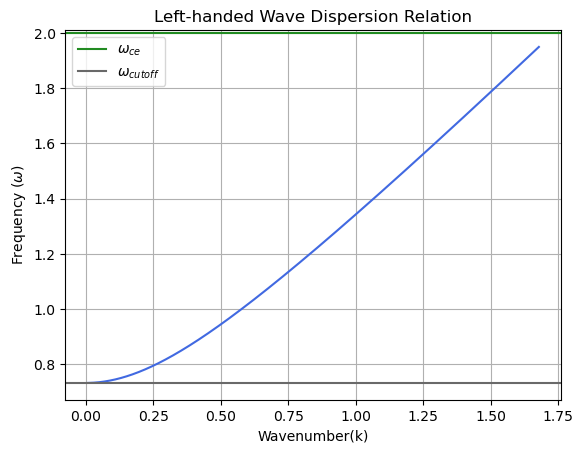

In [8]:
plt.plot(k_iL, omega_iL, "royalblue" )
plt.axhline(omega_ce, color="forestgreen", label = r"$\omega_{ce}$")
plt.axhline(f_cut_L, color="dimgray", label = r"$\omega_{cutoff}$")
plt.title("Left-handed Wave Dispersion Relation")
plt.xlabel("Wavenumber(k)")
plt.ylabel(r"Frequency ($\omega$)")
plt.grid(True)
plt.legend()
plt.savefig("left-hand_dr.png", dpi = 800)
plt.show()

## Perpendicular Propagation: Ordinary and Extraordinary wave

* Dispertion relation(Ordinary wave): 
$$n^2_O = \frac{k^2}{\omega^2} = 1 - \frac{\omega^2_p}{\omega^2}$$
-Cutoff frequency
$$\omega_O = \omega_p$$
For this wave, there is no resonance.

* Dispertion relation(Extraordinary wave): 
$$n^2_X = \frac{k^2}{\omega^2} = \frac{[(\omega+\omega_{ci})(\omega-\omega_{ce})-\omega^2_p]\cdot[(\omega-\omega_{ci})(\omega+\omega_{ce})-\omega^2_p]}{(\omega^2-\omega^2_{ci})(\omega^2-\omega^2_{ci})+\omega^2_p(\omega_{ce}\omega_{ci}-\omega^2)}$$
-Cutoff frequency when numerator is cero. There are 4 possible solutions. <br>
-Resonance frequencies: Upper hybrid resonance
$$\omega^2_{UH} = \omega^2_{pe} + \omega^2_{ce}$$
Lower hybrid resonance
$$\omega^2_{LH} = \omega_{ci}\omega_{ce}\cdot\frac{ \omega^2_{pe} + \omega_{ci}\omega_{ce}}{\omega^2_{pe} + \omega^2_{ce}}$$

In [9]:
f_cut_O = np.sqrt(omega2_p)
w_uh = np.sqrt(omega2_p + omega_ce**2)

#wavevectors
k_iO = np.linspace(0.0, omega_ce+1.5,10000)
w_iX0 = np.linspace(1.05, 2,10000)
w_iX1 = np.linspace(2.5, 3.75,10000)

In [10]:
#Compute the values of the wave frequency
omega_iO = np.sqrt( (k_iO**2) + omega2_p )
k_iX0 = (w_iX0**2)*(w_iX0*(w_iX0-omega_ce)-omega2_p)*(w_iX0*(w_iX0+omega_ce)-omega2_p)/( (w_iX0**2)*(w_iX0**2-omega_ce**2) + omega2_p*(omega_ce-w_iX0**2))
k_iX0 = np.sqrt(k_iX0)
k_iX1 = (w_iX1**2)*(w_iX1*(w_iX1-omega_ce)-omega2_p)*(w_iX1*(w_iX1+omega_ce)-omega2_p)/( (w_iX1**2)*(w_iX1**2-omega_ce**2) + omega2_p*(omega_ce-w_iX1**2))
k_iX1 = np.sqrt(k_iX1)

/tmp/ipykernel_15139/3851796381.py:6: RuntimeWarning: invalid value encountered in sqrt
  k_iX1 = np.sqrt(k_iX1)


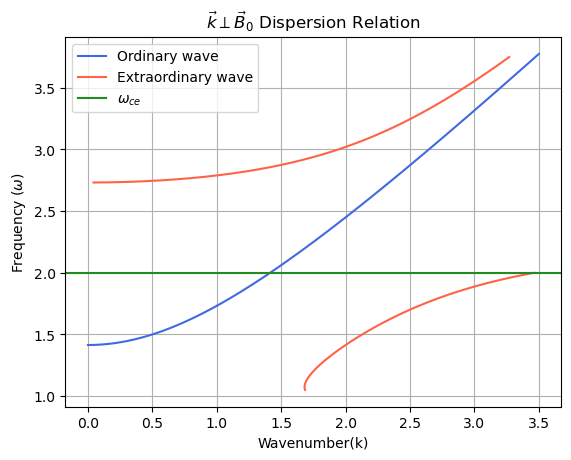

In [11]:
plt.plot(k_iO, omega_iO, "royalblue", label= r"Ordinary wave" )
plt.plot(k_iX0, w_iX0, "tomato", label= r"Extraordinary wave" )
plt.plot(k_iX1, w_iX1, "tomato" )
plt.axhline(omega_ce, color="forestgreen", label = r"$\omega_{ce}$")
plt.title(r"$\vec{k}\perp\vec{B}_0$ Dispersion Relation")
plt.xlabel("Wavenumber(k)")
plt.ylabel(r"Frequency ($\omega$)")
plt.grid(True)
plt.legend()
plt.savefig("ordinary_dr.png", dpi = 800)
plt.show()